# An analysis on Google Play Store Apps

In this project, I will try to explore, visualize and answer some of the basic questions from the **Google Play Store Dataset**. I will be applying some of the analysis techniques to analyze the dataaset with help of tools like:- `Python`, `Pandas`, `Matplotlib`, `Numpy`, `Seaborn`, and `Jovian`. This project is being done as a *final course project* while pursuing the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com) provided by [Jovian.ml](https://www.jovian.ml/) in collaboration with [freecodecamp](https://www.freecodecamp.org/). While doing this project I have learned many techniques and gained various skills in Data Analysis Domain.

**Dataset** :- The dataset is being taken from Kaggle and it can be downloaded from here[Dataset](https://www.kaggle.com/lava18/google-play-store-apps).

## Downloading the Dataset

The dataset is being downloaded from here:- [Link](https://www.kaggle.com/lava18/google-play-store-apps)

In [1]:
project_name = "GooglePlayStoreAnalysis"

## Data Preparation and Cleaning

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data. Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [2]:
# Imports
import pandas as pd
import numpy as np
import jovian

import warnings
warnings.filterwarnings('ignore')

### Load the dataset as dataframe

> Before running this project make sure that you have extracted the dataset after downloading it from kaggle.

In [3]:
googlestore_df =  pd.read_csv('googleplaystore.csv')

In [4]:
rows = googlestore_df.shape[0]
column = googlestore_df.shape[1]

### Let's print the number of rows and the column

In [5]:
print('There are {} Rows and {} Columns in the dataset'.format(rows, column))

There are 10841 Rows and 13 Columns in the dataset


In [6]:
googlestore_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
googlestore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
googlestore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Does the dataframe contains any `Nan` value?

In [9]:
googlestore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We can see that we have some missing values in the dataset. Lets have a detailed look of the missing values in the dataframe.

Let's define a function to view some more insights of the dataset.

In [10]:
def printinfo():
    temp = pd.DataFrame(index=googlestore_df.columns)
    temp['data_type'] = googlestore_df.dtypes
    temp['null_count'] = googlestore_df.isnull().sum()
    temp['unique_count'] = googlestore_df.nunique()
    return temp

In [11]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


### Let's have a look at the rows of the column `Rating` having `NULL` values

In [12]:
googlestore_df[googlestore_df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


### Let's have a look at the rows of the column `Type` having `NULL` values

In [13]:
googlestore_df[googlestore_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


#### Since there is only one value missing in the `Type` column
So, Lets fill the missing value, After cross-checking in the playstore the missing value is found to  be `Free`, So Now we can fill the missing value with `Free`

In [14]:
googlestore_df['Type'].fillna("Free", inplace = True)

In [15]:
googlestore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Let's have a look at the rows of the column `Content Rating` having `NULL` values

In [16]:
googlestore_df[googlestore_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
googlestore_df.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up


From the above command we can see that row `10472` have a missing data for category column and all the prevailing column  values is being replaced with its previous column. Better idea will be to drop this row from out dataframe.

In [18]:
googlestore_df.dropna(subset = ['Content Rating'], inplace=True)

### We can drop the unwanted columns

In [19]:
googlestore_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [20]:
googlestore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


### Let us replace the missing values of the `Rating` Column with the `Mode` value of that entire column.

In [21]:
modeValueRating = googlestore_df['Rating'].mode()

In [22]:
modeValueRating[0]

4.4

In [23]:
googlestore_df['Rating'].fillna(value=modeValueRating[0], inplace = True)

In [24]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


> Now we are done with the data cleansing part and in a state to start the work for data preparation 

Firstly, we need to convert the data types with their respective actual type<br>
`Reviews`, `Size`, `Installs`, & `Price` should have an `integer` or `float` datatype, But here we can see of `object` type, So let's convert them to their respective type.

#### Column: `Reviews`
Converting the `Reviews` column to *integer*.

In [25]:
googlestore_df['Reviews'] = googlestore_df.Reviews.astype(int)

In [26]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


#### Column: `Size`
Converting the `Size` Column from *object* to *integer*.

Removing the `+` Symbol

In [27]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.strip('+'))# Removing the + Sign

Removing the `,` Symbol

In [28]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace(',', ''))# For removing the `,`

Replacing the `M` by multiplying the value with 1000000

In [29]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega

Replacing the `k` by multiplying the value with 1000.

In [30]:
googlestore_df['Size'] = googlestore_df.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo

Replacing the `Varies with device` value with *Nan*.

In [31]:
googlestore_df['Size'] = googlestore_df.Size.replace('Varies with device', np.NaN)

Finally converting to Numeric type.

In [32]:
googlestore_df['Size'] = pd.to_numeric(googlestore_df['Size']) # Converting the string to Numeric type

In [33]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


It will be better idea to drop the Rows of the column **Size** having `Nan` values, becuase it will be not a better idea to replace those value with mean or mode since, the size of some apps would be too large and some of them too small.

In [34]:
googlestore_df.dropna(subset = ['Size'], inplace=True)

In [35]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


#### Column: `Installs`
Converting the `Installs` column from *object* to *integer*

First of all we will need to remove the `+` symbol from the values

In [36]:
googlestore_df['Installs'] = googlestore_df.Installs.apply(lambda x: x.strip('+'))

Then let's remove the `,` from the numbers.

In [37]:
googlestore_df['Installs'] = googlestore_df.Installs.apply(lambda x: x.replace(',', ''))

Lastly we will need to convert it from `string` type to `numeric` type

In [38]:
googlestore_df['Installs'] = pd.to_numeric(googlestore_df['Installs'])

In [39]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


#### Column: `Price`
Converting the **Price** column from `object`to `numeric`

Let us have a look at the unique values of the column.

In [40]:
googlestore_df['Price'].value_counts()

0          8421
$0.99       145
$2.99       114
$1.99        66
$4.99        65
           ... 
$379.99       1
$15.99        1
$394.99       1
$2.60         1
$4.29         1
Name: Price, Length: 87, dtype: int64

We can remove the `$` symbol from those values

In [41]:
googlestore_df['Price'] = googlestore_df.Price.apply(lambda x: x.strip('$'))

Now we can convert the values to `Numeric` type.

In [42]:
googlestore_df['Price'] = pd.to_numeric(googlestore_df['Price'])

In [43]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


In [44]:
googlestore_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.208868,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.507267,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.400000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


---------------**Now we are done with the ``Data Preparation and Cleaning``**------------------

**Note**: In this section *Data Preparation and Cleaning*. We can see that the original dataset contains `10841` Rows and `13` Columns. It contained `App`,	`Category`,	`Rating`, `Reviews`, `Size`, `Installs`, `Type`, `Price`, `Content Rating`, `Genres`, `Last Updated`, `Current Ver`, and `Android Ver` Columns. But after cleansing the dataset and droping the unwanted rows and columns having Null Values and Garbage data from the database, we are left with `8434` Rows and `10` Columns.

---

## Exploratory Analysis and Visualization

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping establishes how data values will be represented visually, determining how and to what extent a property of a graphic mark, such as size or color, will change to reflect changes in the value of a datum.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [45]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's first of all explore the column of `object` type.

In [46]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116


Can we see all the *categories* from the `Category` column.

In [47]:
googlestore_df['Category'].value_counts()

FAMILY                 1832
GAME                   1015
TOOLS                   739
MEDICAL                 434
BUSINESS                400
PERSONALIZATION         355
LIFESTYLE               345
SPORTS                  311
FINANCE                 307
PRODUCTIVITY            303
COMMUNICATION           265
HEALTH_AND_FITNESS      264
PHOTOGRAPHY             254
NEWS_AND_MAGAZINES      216
DATING                  212
SOCIAL                  210
SHOPPING                201
BOOKS_AND_REFERENCE     197
TRAVEL_AND_LOCAL        192
VIDEO_PLAYERS           131
EDUCATION               111
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK          100
ENTERTAINMENT            90
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
HOUSE_AND_HOME           68
ART_AND_DESIGN           62
WEATHER                  57
EVENTS                   57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

Let's Plot it and have a visual look.

In [48]:
y = googlestore_df['Category'].value_counts().index
x = googlestore_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

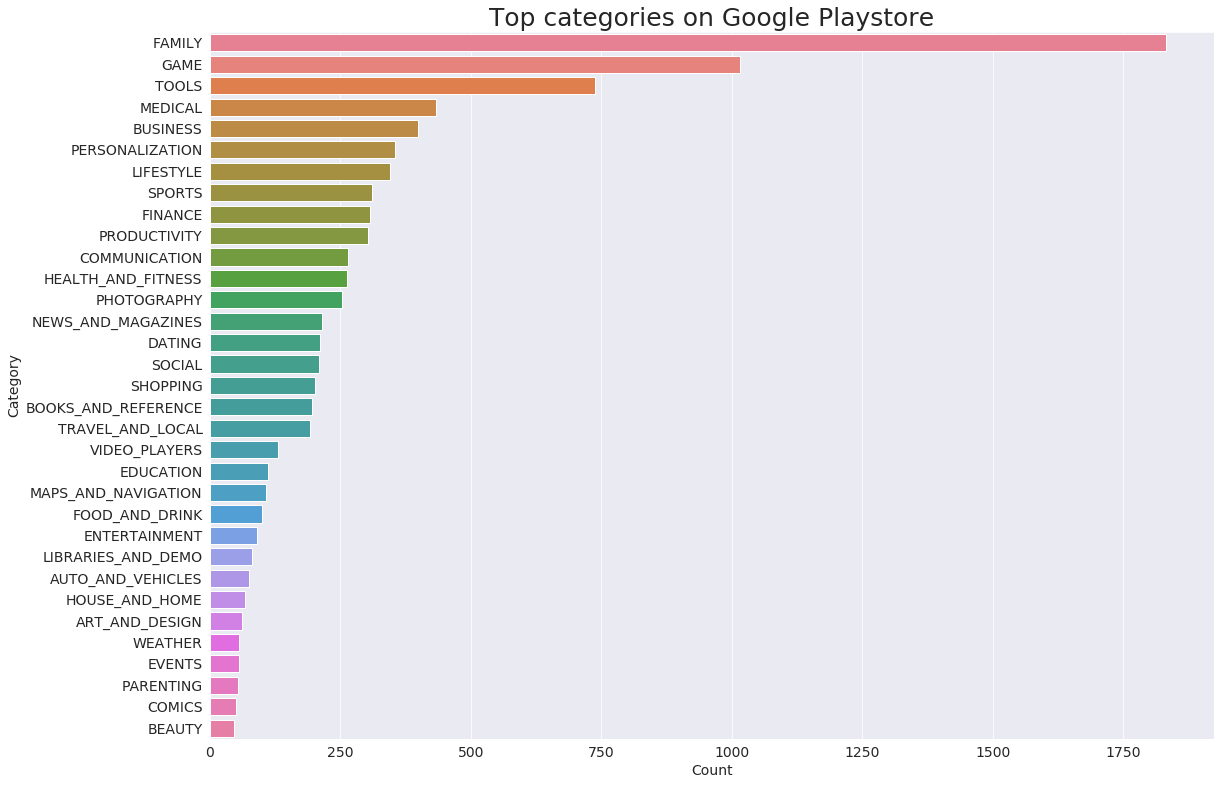

In [49]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

**Note:** So there are all total 33 categories in the dataset
From the above output we can come to a conclusion that in playstore most of the apps are under `Family` & `Game` category and least are of `Beauty` & `Comics` Category.

### Which category of Apps from the `Content Rating` column are found more on `playstore`

In [50]:
x2 = googlestore_df['Content Rating'].value_counts().index
y2 = googlestore_df['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

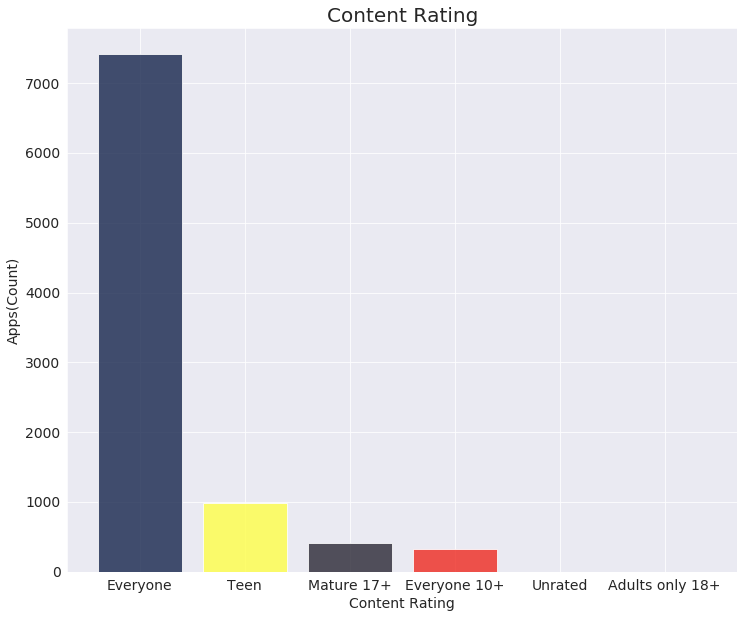

In [51]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

**Note**: From the above plot we can see that `Everyone` category has the highest number of apps.

### Let's have a look at the distribution of the ratings the dataframe.

In [52]:
googlestore_df['Rating'].describe()

count    9145.000000
mean        4.208868
std         0.507267
min         1.000000
25%         4.100000
50%         4.400000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

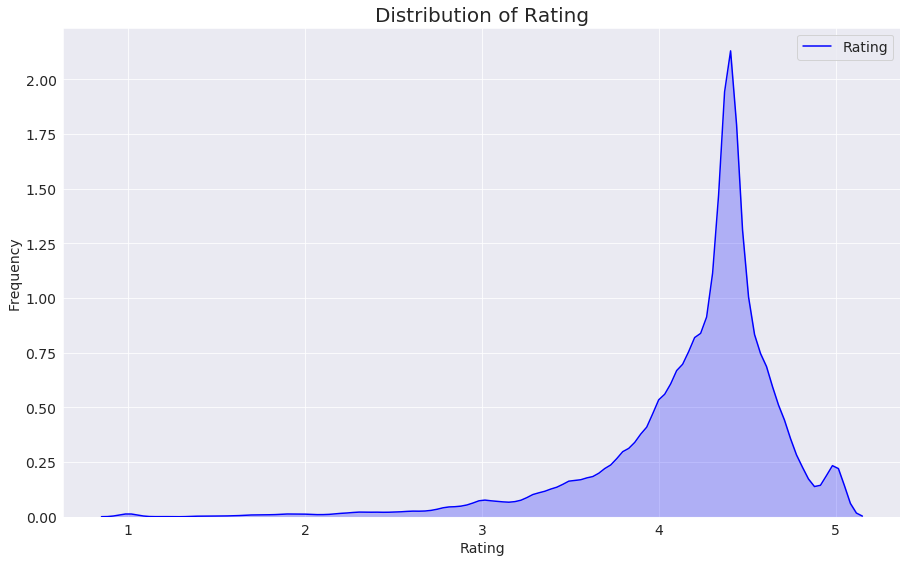

In [53]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(googlestore_df.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

**Note**: From the above graph we can come to a conclusion that most of the apps in google playstore are rated in between `3.5` to `4.8`

### Let's plot a visualization graph to view what portion of the apps in playstore are paid and free

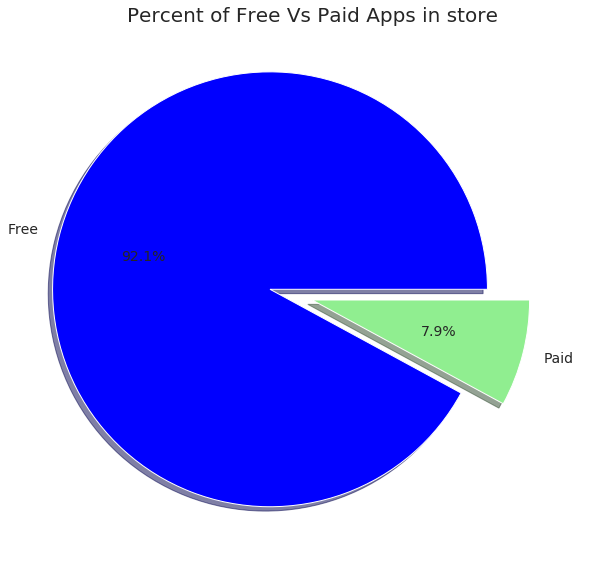

In [54]:
plt.figure(figsize=(10,10))
labels = googlestore_df['Type'].value_counts(sort = True).index
sizes = googlestore_df['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

**Note:** From the above graph we can see that 92%(Approx.) of apps in google play store are free and 8%(Approx.) are paid.

### Which category App's have most number of installs?

In [55]:
highest_Installs_df = googlestore_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [56]:
highest_Installs_df.head()

,Installs
Category,
GAME,29874564253
FAMILY,6798793425
COMMUNICATION,4941943051
NEWS_AND_MAGAZINES,4252005650
TOOLS,3527094815


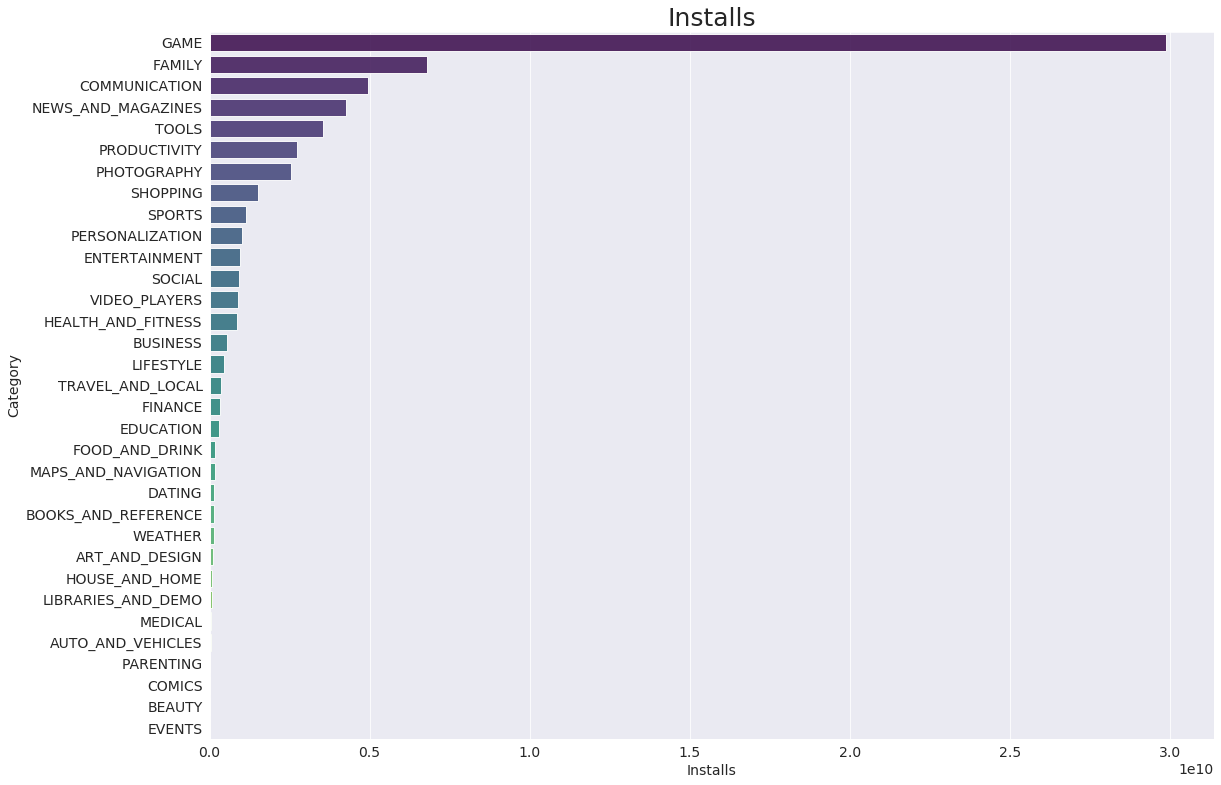

In [57]:
x2sis = []
y2sis = []

for i in range(len(highest_Installs_df)):
    x2sis.append(highest_Installs_df.Installs[i])
    y2sis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

**Note:** From the above visualization, it can be interpreted that the top categories with highest installs are `Game`, `Family`, `Communication`, `News & Magazines`, & `Tools`.

---

## Asking and Answering Questions

With the help of Data Analysis, we can answer to many questions which can't be answerd just by looking at the dataset. By querying on the dataset, and understanding the pattern and rate of growth and fall of any values we can come to many conclusions, and get insightfull information from it.


#### Q1: What are the Top 10 installed apps in any `category`?

In [58]:
def findtop10incategory(str):
    str = str.upper()
    top10 = googlestore_df[googlestore_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

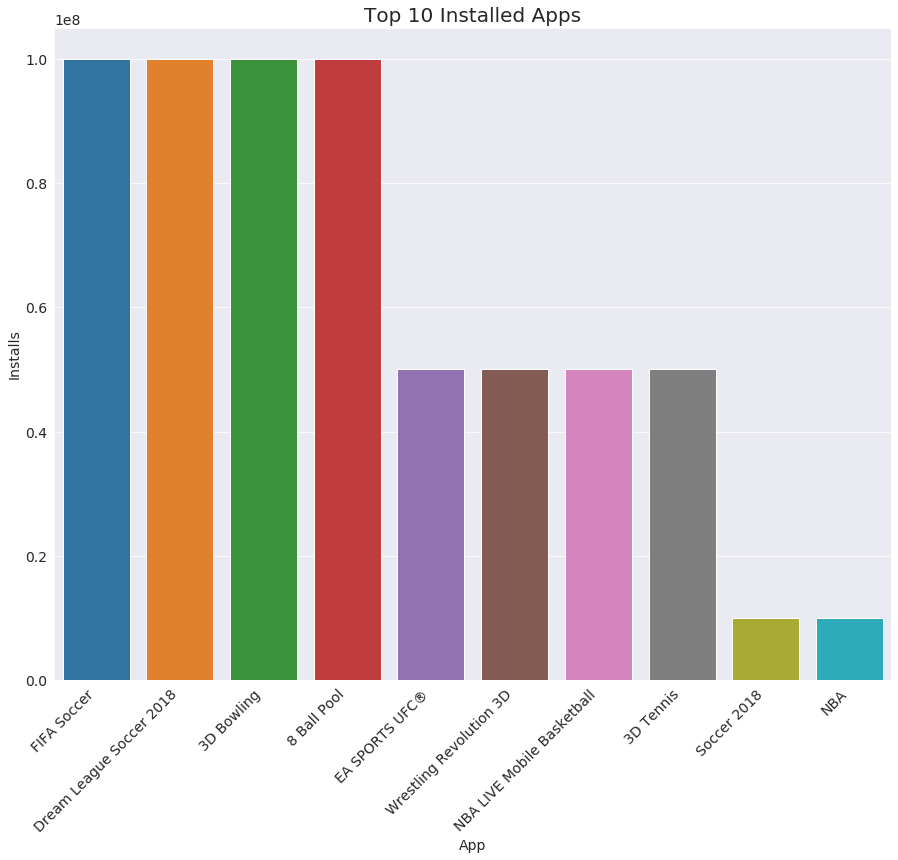

In [59]:
findtop10incategory('Sports')

**Note:** From the above graph we can see that in the `Sports` category **FIFA Soccer**, and **Dream League Soccee 2018** has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

#### Q2: Which are the top 10 expensive Apps in playstore?

In [60]:
top10PaidApps = googlestore_df[googlestore_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
# top10PaidApps

In [61]:
top10PaidApps_df = top10PaidApps[['App', 'Installs']].drop(9934)

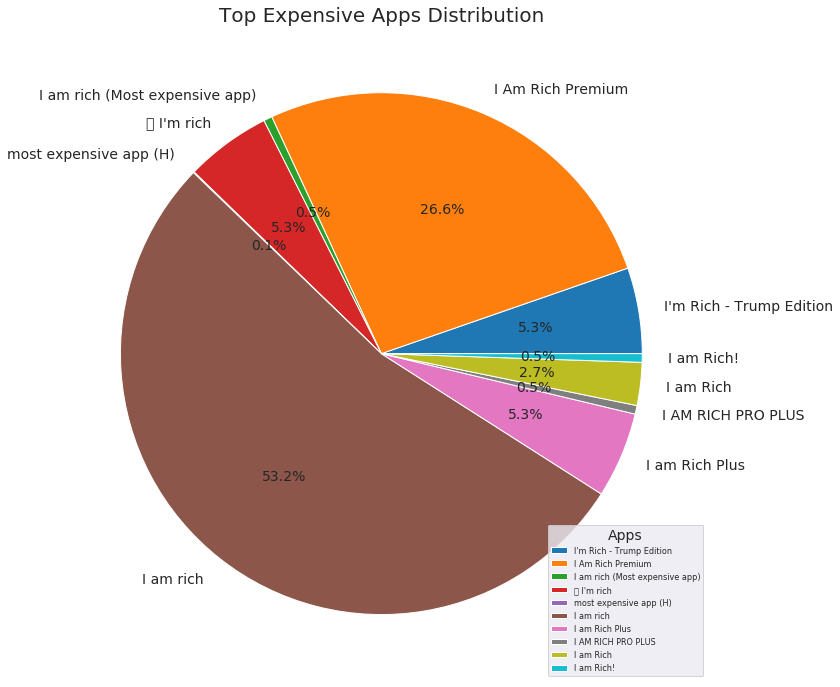

In [62]:
plt.figure(figsize=(15,12));
plt.pie(top10PaidApps_df.Installs, explode=None, labels=top10PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10PaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

**Note:** From the above graph we can interprete that the App `I am rich` is the most expensive app in the google playstore followed by `I am Rich Premium`. we also had to drop one row data for this visualization because the language of the app was `Chinese` and it was messing with the pie chart, visualization.

#### Q3: Which are the Apps with highest number of reviews?

In [63]:
Apps_with_Highest_rev = googlestore_df.sort_values(by='Reviews', ascending=False).head(20)

In [64]:
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1704,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1917,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1700,Subway Surfers,GAME,4.5,27723193,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
3896,Subway Surfers,GAME,4.5,27711703,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade


**Note:** From the above dataframe we can interprete, and come to conculsion that the Apps like `Clash of Clans`, `Subway Surfers`, `Clash Royale`, and `Candy Crush Saga` has the highest number of reviews on google playstore.

#### Q4: What are the count of Apps in different genres?

In [65]:
topAppsinGenres = googlestore_df['Genres'].value_counts().head(50)

In [66]:
x3sis = []
y3sis = []

for i in range(len(topAppsinGenres)):
    x3sis.append(topAppsinGenres.index[i])
    y3sis.append(topAppsinGenres[i])

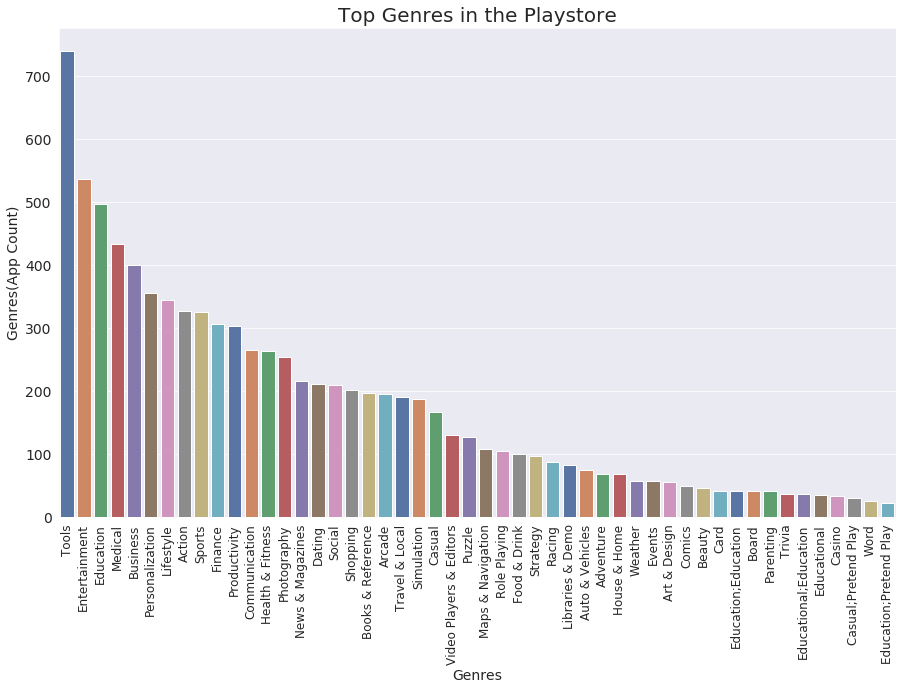

In [67]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

**Note:** From the above visualization we can see that the Highest Number of Apps found in the `Tools` and `Entertainment` genres followed by `Education`, `Medical` and many more.

#### Q5: Which are the apps that have made the highest earning?

In [68]:
Paid_Apps_df = googlestore_df[googlestore_df['Type'] == 'Paid']

In [69]:
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]

In [70]:
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];

In [71]:
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)

In [72]:
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

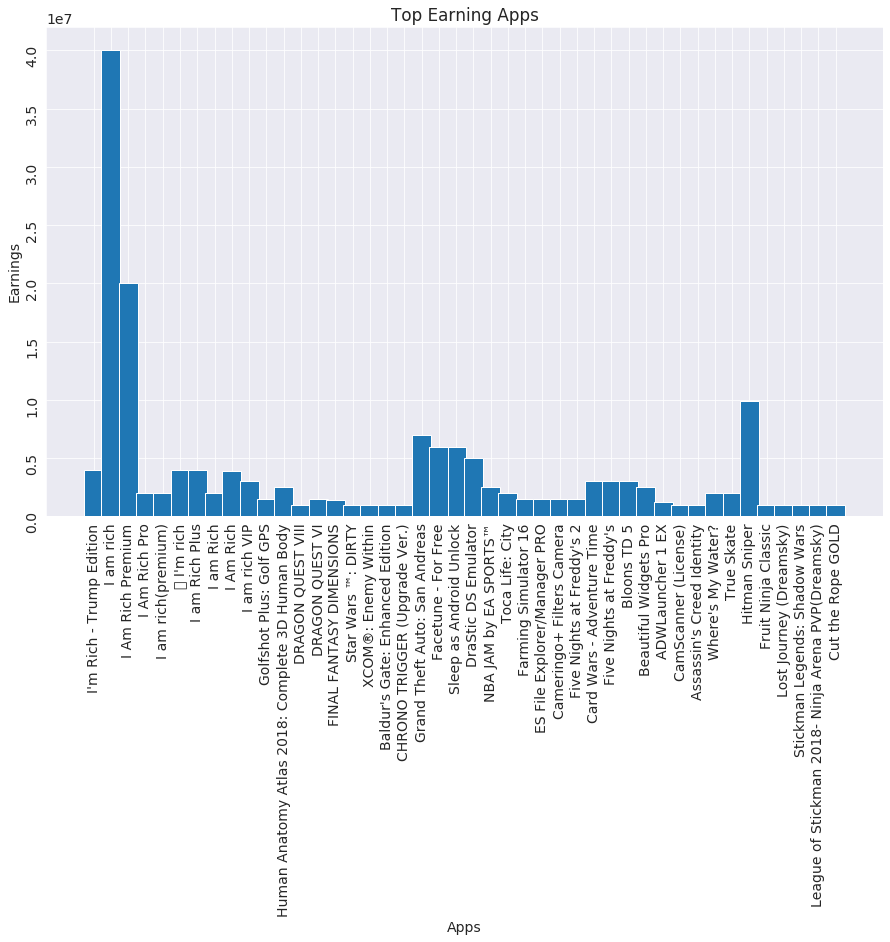

In [73]:
# PLot a bar chart of earning at y and app names at x
plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

**Note:** The top five apps with highest earnings found on google playstore are:-
- `I am Rich`
- `I am Rich Premium`
- `Hitman Sniper`
- `Grand Theft Auto: San Andreas`
- `Facetune - For Free`

---

## Inferences and Conclusion

*After Analyzing the dataset I have got answers to some of the serious & interesting question which any of the android users would love to know.*

1. ***Top categories on Google Playstore?***
2. ***Which category of Content are found more?***
3. ***Distribution of the ratings of the apps?***
4. ***What percentage of apps are Free and Paid?***
5. ***Which category of App's have most number of installs?***
6. ***What are the Top 10 installed apps in different category?***
7. ***Which are the top expensive Apps?***
8. ***Which are the Apps with highest number of reviews?***
9. ***Count of Apps found in different genres?***
10. ***Which are the apps that have made the highest earning?***

After the completion of my project and the course I have learned and got exposure to different tools and techniques in data analysis. I was able to complete the project successfully with the help of tools like Python, Pandas, Matplotlib, Numpy, Seaborn, and Jovian. Also I learned different techniques like Data Cleaning, Data Preparation, Data Exploration and visualization, and Data Interpretation. Lastlty I would like to thank `@Aakash N S` Sir for organising this course for `Free` from [jovian.ml](https://www.jovian.ml/) in collaboration with [freecodecamp.org](https://www.freecodecamp.org/).<br>
> For more details about this course visit:- [LINK](zerotopandas.com)

## References and Future Work
### References
- https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
- https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
- https://www.youtube.com/playlist?list=PLWKjhJtqVAblvI1i46ScbKV2jH1gdL7VQ

### Future Work:
- After this analysis is done I want to take it one step further by deploying a Web App for answering to different questions of many users all around the globe, which may help different app developers before for making certain decision before starting their work.

In [74]:
# jovian.commit(message="Completed")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "manishshah120/googleplaystoreanalysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/manishshah120/googleplaystoreanalysis


'https://jovian.ml/manishshah120/googleplaystoreanalysis'

                                        ---The END---